In [1]:
import pandas as pd
import re
import nltk

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("satisfaction_review_train.csv")
df.head()

,Ticket satisfaction comment,Ticket satisfaction rating
0,amazing I found just what I was looking for,Good
1,best customer service ever!,Good
2,Best retail experience I’ve had in ages! \nTh...,Good
3,Called buckle first thing in the morning.. on...,Bad
4,Customer service is great,Good


In [3]:
df.dtypes

Ticket satisfaction comment    object
Ticket satisfaction rating     object
dtype: object

In [6]:
df.isna().sum()

Ticket satisfaction comment    2
Ticket satisfaction rating     0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Ticket satisfaction comment    0
Ticket satisfaction rating     0
dtype: int64

In [11]:
# remove punctuation

df['comment_processed'] = \
df['Ticket satisfaction comment'].map(lambda x: re.sub('[,\.!?]', '', x))

In [13]:
# convert all text to lower case

df['comment_processed'] = \
df['comment_processed'].map(lambda x: x.lower())

In [14]:
df['comment_processed'].head()

0         amazing i found just what i was looking for 
1                          best customer service ever 
2     best retail experience i’ve had in ages \nthe...
3     called buckle first thing in the morning on f...
4                            customer service is great
Name: comment_processed, dtype: object

In [16]:
# load in the stop words

stop_words = set(stopwords.words('english'))


In [17]:
# function to remove stop words

def remove_stopwords(comment_processed):
    # tokenize the text
    words = nltk.word_tokenize(comment_processed)
    # remove the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # join the filtered words back in a sentence
    return ' '.join(filtered_words)

# apply the function to comment_processed column
df['comment_processed'] = df['comment_processed'].apply(remove_stopwords)

df.head()

,Ticket satisfaction comment,Ticket satisfaction rating,comment_processed
0,amazing I found just what I was looking for,Good,amazing found looking
1,best customer service ever!,Good,best customer service ever
2,Best retail experience I’ve had in ages! \nTh...,Good,best retail experience ’ ages girls working st...
3,Called buckle first thing in the morning.. on...,Bad,called buckle first thing morning 20min decide...
4,Customer service is great,Good,customer service great


In [18]:
df.tail()

,Ticket satisfaction comment,Ticket satisfaction rating,comment_processed
9994,She was very thorough in explaining the proces...,Good,thorough explaining process lost package
9995,She was very very helpful. I have to call the ...,Good,helpful call main number special order size 8 ...
9996,She was wonderful !!,Good,wonderful
9997,She was wonderful and friendly!,Good,wonderful friendly
9998,She was wonderful!!,Good,wonderful


In [20]:
# creating an instance of the SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [23]:
# define function to apply the analyzer to our processed comments

def get_sentiment(comment_processed):
    scores = analyzer.polarity_scores(comment_processed)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# apply function to the processed comments

df['sentiment'] = df['comment_processed'].apply(get_sentiment)

df.head(20)

,Ticket satisfaction comment,Ticket satisfaction rating,comment_processed,sentiment
0,amazing I found just what I was looking for,Good,amazing found looking,positive
1,best customer service ever!,Good,best customer service ever,positive
2,Best retail experience I’ve had in ages! \nTh...,Good,best retail experience ’ ages girls working st...,positive
3,Called buckle first thing in the morning.. on...,Bad,called buckle first thing morning 20min decide...,positive
4,Customer service is great,Good,customer service great,positive
5,customer service was good. The web site howev...,Good,customer service good web site however makes d...,positive
6,Fast reply,Good,fast reply,neutral
7,First time customer and was not shipped me my...,Bad,first time customer shipped full order order s...,neutral
8,gave me an answer quickly,Good,gave answer quickly,neutral
9,Great customer service took care of delivery ...,Good,great customer service took care delivery issu...,positive


In [24]:
df['Ticket satisfaction rating'].value_counts()

Good    5949
Bad     4048
Name: Ticket satisfaction rating, dtype: int64

In [25]:
df['sentiment'].value_counts()

positive    6527
neutral     1768
negative    1702
Name: sentiment, dtype: int64

In [27]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

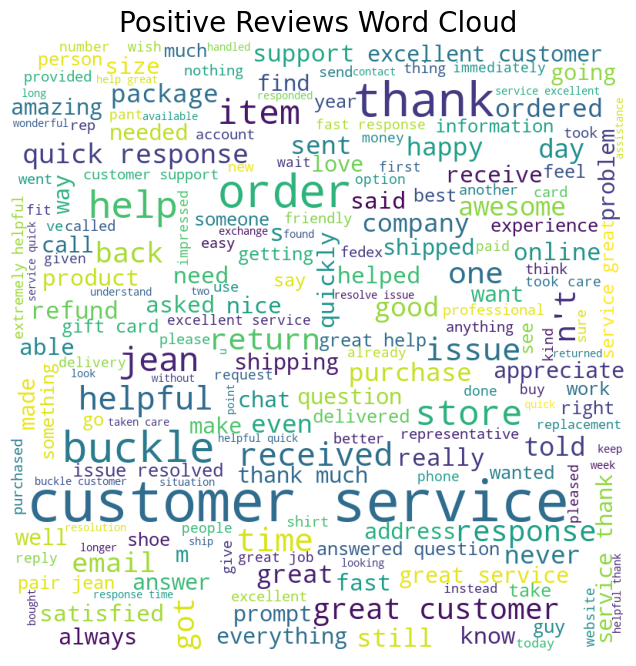

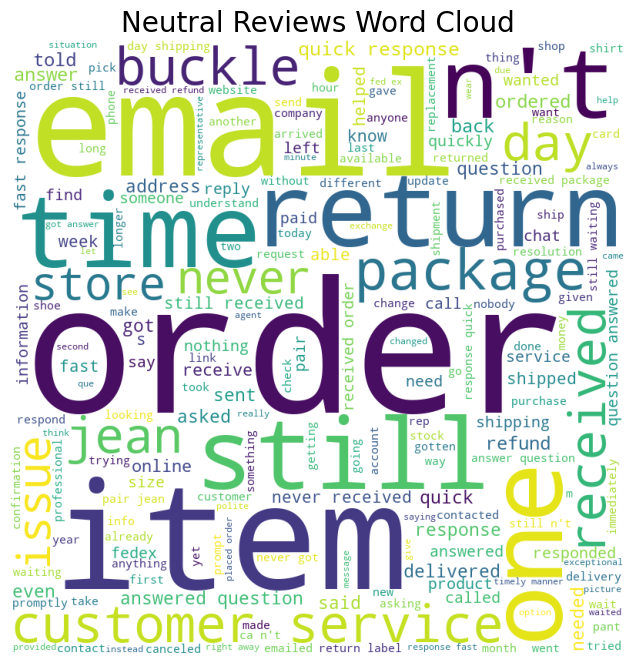

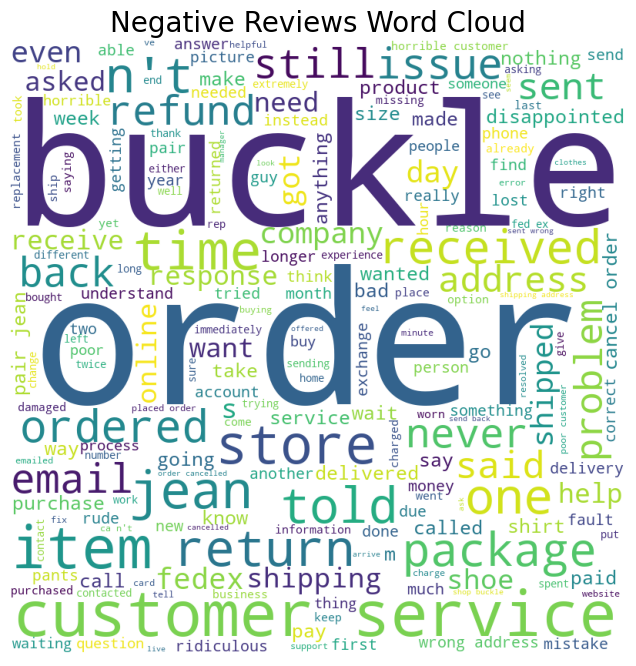

In [32]:
# Create a function to generate word clouds
def generate_wordcloud(df, title):
    # Concatenate all the review texts for the given sentiment label
    text = ' '.join(df['comment_processed'].tolist())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Generate word clouds for positive, neutral, and negative reviews
generate_wordcloud(df[df['sentiment']=='positive'], 'Positive Reviews Word Cloud')
generate_wordcloud(df[df['sentiment']=='neutral'], 'Neutral Reviews Word Cloud')
generate_wordcloud(df[df['sentiment']=='negative'], 'Negative Reviews Word Cloud')
